<a href="https://colab.research.google.com/github/Harshini-2k5/minicodes/blob/main/colorpalette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Enter a mood or theme (e.g., 'calm ocean', 'sunset vibes'): ocean vibes


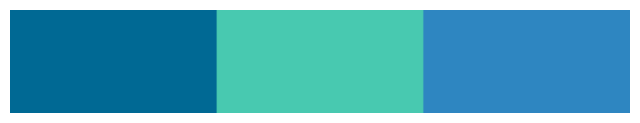

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
from collections import OrderedDict

# Load a pre-trained NLP model
nlp_model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample dataset mapping words to HEX colors (can be expanded)
color_database = {
    "calm": ["#5F9EA0", "#4682B4", "#87CEEB"],  # Aqua, Steel Blue, Sky Blue
    "ocean": ["#006994", "#48C9B0", "#2E86C1"],  # Deep Ocean Colors
    "sunset": ["#FF4500", "#FF6347", "#FFD700"],  # Orange Red, Tomato, Gold
    "forest": ["#228B22", "#006400", "#8FBC8F"],  # Green Shades
    "love": ["#FF1493", "#DB7093", "#FF69B4"],  # Pink & Magenta
    "energy": ["#FF8C00", "#FFD700", "#DC143C"],  # Dark Orange, Gold, Crimson
}

# Function to find the best color match for a given text
def get_colors_from_text(input_text):
    input_vector = nlp_model.encode(input_text)

    # Find the closest match in our color database
    best_match = None
    best_similarity = -1

    for word, colors in color_database.items():
        word_vector = nlp_model.encode(word)
        similarity = np.dot(input_vector, word_vector) / (np.linalg.norm(input_vector) * np.linalg.norm(word_vector))

        if similarity > best_similarity:
            best_similarity = similarity
            best_match = colors

    return best_match if best_match else ["#FFFFFF"]  # Default to white if no match found

# Function to create a color palette
def display_palette(colors):
    palette = np.zeros((50, 300, 3), dtype=np.uint8)

    step = 300 // len(colors)
    for i, hex_color in enumerate(colors):
        rgb_color = tuple(int(hex_color[j:j+2], 16) for j in (1, 3, 5))  # Convert HEX to RGB
        palette[:, i * step:(i + 1) * step] = rgb_color

    plt.figure(figsize=(8, 2))
    plt.imshow(palette)
    plt.axis("off")
    plt.show()

# Example Usage
user_input = input("Enter a mood or theme (e.g., 'calm ocean', 'sunset vibes'): ")
colors = get_colors_from_text(user_input)
display_palette(colors)
